# Numisma
*Application de classification d'anciennes monaies*

## Présentation
L'objectif principal est de **permettre de faciliter la reconnaissance des les liasons de coin parmis un ensemble de photos de monnaies**. Cette version de l'algorithme utilise une approche plus simple et directe que la version précédente car elle utilise des outils de detection des points d'intérêts (PI) connus.

L'algorithme se compose de deux étapes :
- detection des PI 
- recherche de correspondance entre les PI 

### Detection des PI 

La phase de détection des PI est essentiellement basé sur l'algorithme *"Scale Invariant Feature Transform"* (SIFT) qui est présenté dans le <a href="https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html"> tutoriel de OpenCV </a>. SIFT est considéré comme **le plus robuste** (luminosité, transformation...) même si il est plus lent que la plupart des autres algorithmes implementé dans OpenCV. 

### Recherche de correspondance
La recherche de correspondance s'effecture par brute force avec un ratio de seuil selon <a href="https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html"> ce tutoriel d'OpenCV </a>. Ces différentes correspondances sont ensuite filtré par l'algorithme RANSAC qui permet de garder uniquement les liens qui correspondent à une transformation rigide (rotation + translation + scale) et de trouver la matrice de transformation correspondante.


### Interface graphique
La matrice de transformation Rigide peut être utilisée pour superposer les monnaies et ainsi faciliter la reconnaissace des liaisons de coin. Un inteface graphique permet de visualiser les liaisons avec un slider entre deux monnaies superposées.



## Aperçu du fonctionnement



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


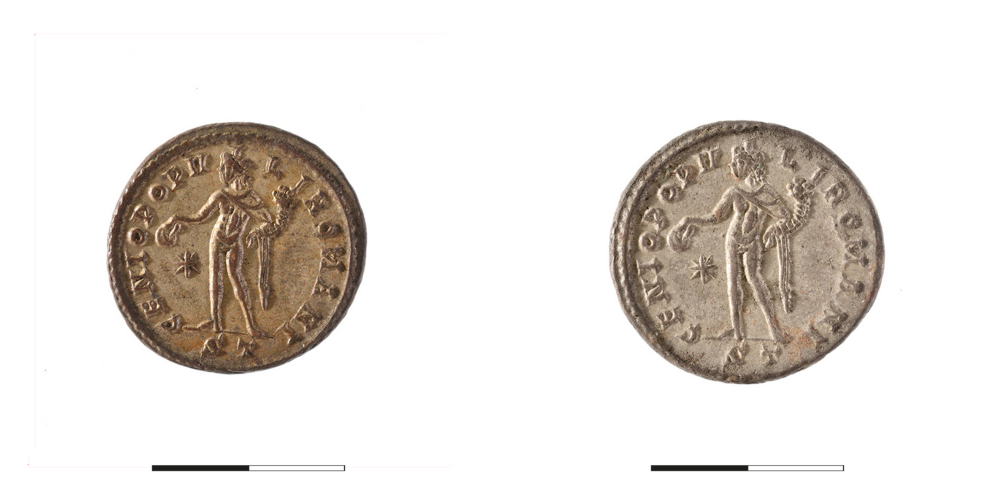

In [4]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import matplotlib.pyplot as plt

#image test
path1 = Path("data/dataTest1/36848 Revers.jpg")
path2 = Path("data/dataTest1/11621 Revers.jpg")

# lecture des images
img1 = plt.imread(path1)
img2 = plt.imread(path2)

## Affichage des images test
fig,[ax0,ax1] = plt.subplots(1,2,figsize=(14,7))
ax0.imshow(img1)
ax0.axis('off')
ax1.imshow(img2)
ax1.axis('off')
plt.tight_layout()
plt.show()


## detection des points d'intérêts 

chargement images : 0.016440629959106445
SIFT detect : 0.6288378238677979
BF matcher : 0.06247997283935547
Ratio test : 0.015623807907104492
Rigid estimation : 0.0


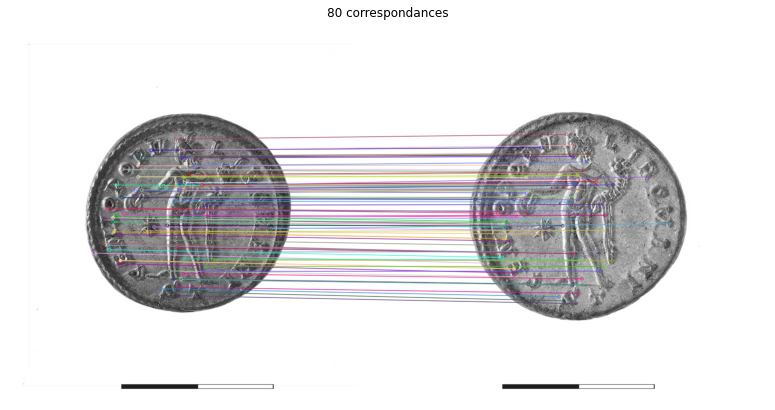

In [6]:
from core import getImgDrawMatch

img3,nb = getImgDrawMatch(path1,path2,ratio=0.9,contrastThreshold=0.01,ransacReprojThreshold=10)
plt.subplots(figsize=(14,7))
plt.imshow(img3)
plt.axis("off")
plt.title(f"{nb} correspondances")
plt.show()

## Superposition des monnaies

Utile pour la verification avec un slider intégré dans le GUI

In [7]:
import cv2 as cv
from core import getMatchedFeaturesNumber

contrastThreshold = 0.01
ratio = 0.9

img1 = cv.imread(str(path1),0)
img2 = cv.imread(str(path2),0)

M,nb = getMatchedFeaturesNumber(img1,img2,contrastThreshold=contrastThreshold,ratio=ratio)


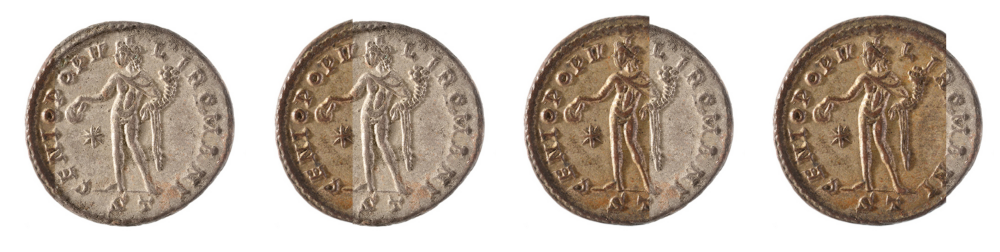

In [8]:
from core import getSliderImg

img1 = cv.imread(str(path1)) # queryImage
img2 = cv.imread(str(path2)) # trainImage

fig,axes = plt.subplots(1,4,figsize=(14,7))
plt.tight_layout()

sliderPos = [0.2,0.4,0.6,0.8]

for idx,ax in enumerate(axes.ravel()):
    pos = sliderPos[idx]
    ax.imshow(getSliderImg(img1,img2,M,pos,250))
    ax.axis("off")
    
plt.tight_layout()
plt.show()



In [9]:
import numpy as np
from core import getMatrixFromFolder

In [13]:
folder = Path("data/dataTest1/").resolve()

In [14]:
contrastThreshold = 0.01
ratio = 0.9

##### Calcul sur un dossier ######
#nameList, D ,Hm= getMatrixFromFolder(folder,contrastThreshold=contrastThreshold,ratio=ratio)
##### Enregisrements des données dans le dossier
#np.save(Path(folder,"D.npy"),D)
#np.save(Path(folder,"Hm.npy"),Hm)
#np.save(Path(folder,"nameList.npy"),nameList)

True


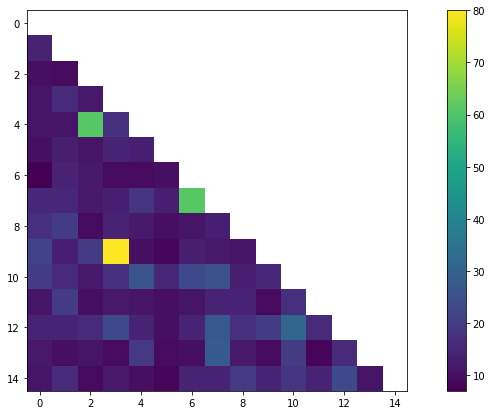

In [15]:
from core import isDataAvailable,getSavedData
print(isDataAvailable(folder))

nameList, D ,Hm = getSavedData(folder)
plt.subplots(figsize=(14,7))
plt.imshow(D)
plt.colorbar()
plt.show()

In [17]:
from core import getOrderedLinks

# lien par ordre decroissants de nombre de correspondance
orderedLinks = getOrderedLinks(D,Hm)
orderedLinks[:5]

array([[ 9,  3],
       [ 7,  6],
       [ 4,  2],
       [12, 10],
       [13,  7]], dtype=int64)

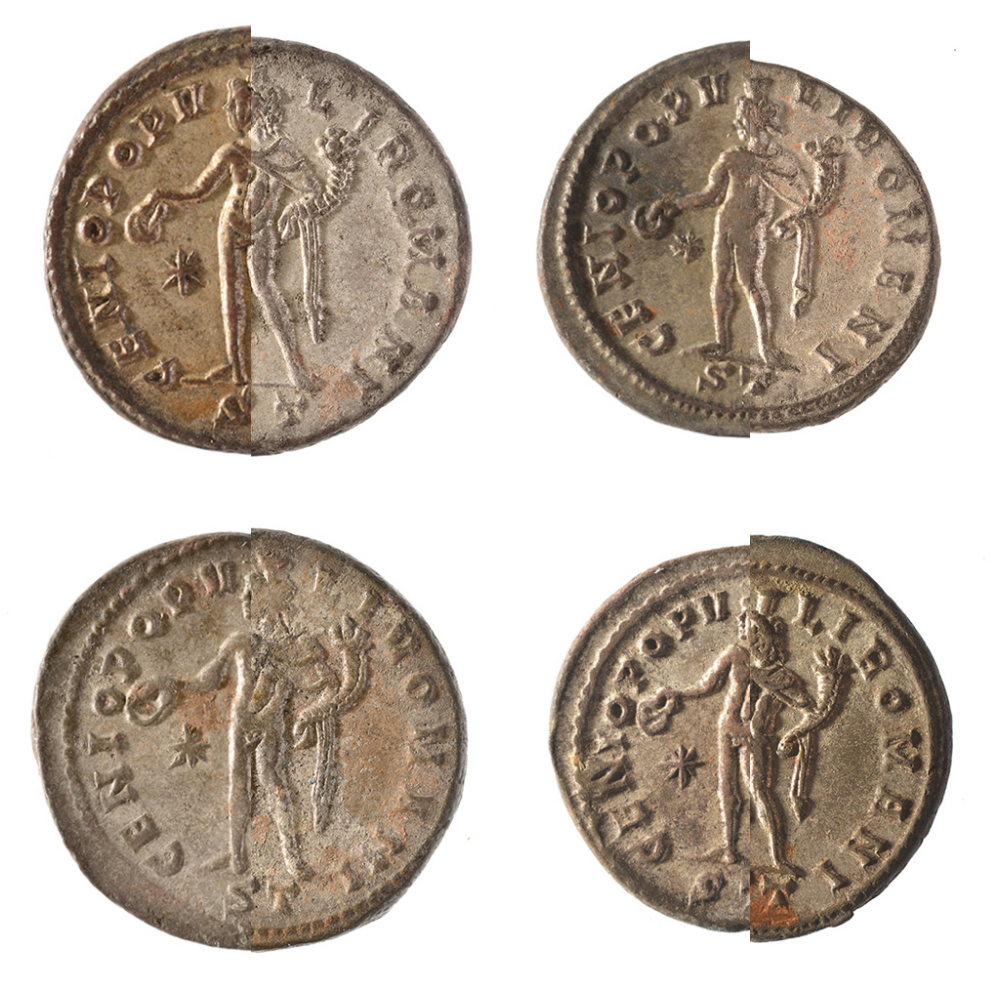

In [18]:
from pathlib import Path
fig,axes = plt.subplots(2,2,figsize=(14,14))
plt.tight_layout()

for idx,ax in enumerate(axes.ravel()):
    id1,id2 = orderedLinks[idx]
    
    path1 = Path(folder,nameList[id1])
    path2 = Path(folder,nameList[id2])
    
    img1 = cv.imread(str(path1)) # queryImage
    img2 = cv.imread(str(path2)) # trainImage
    
    H = Hm[id1,id2]

    ax.imshow(getSliderImg(img1,img2,H,0.5,250))
    ax.axis("off")
    
plt.tight_layout()
plt.show()